<a href="https://colab.research.google.com/github/yves-moringa/CoreIpWk2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Yves_Havugimana_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries

import numpy as np

import seaborn as sns

import pandas as pd

import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts configuration of plots

In [2]:
# Import the csv files

# The variables dataset contains details on the cvariables of our main dataset
variables = pd.read_csv("http://bit.ly/VariableDefinitions")

# The fin_all dataset contains all records for all countries
fin_all = pd.read_csv("http://bit.ly/FinancialDataset")


In [3]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
fin_all.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
fin_all.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Cleaning the data

fin_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
# Missing data

for col in fin_all.columns:
    pct_miss = np.mean(fin_all[col].isnull())
    print('{} - {}%'.format(col, pct_miss))

country - 0.000595136881482741%
year - 0.0%
uniqueid - 0.0%
Has a Bank account - 0.0015303519809556198%
Type of Location - 0.0006376466587315082%
Cell Phone Access - 0.0004676075497364394%
household_size - 0.001190273762965482%
Respondent Age - 0.0014453324264580853%
gender_of_respondent - 0.0014453324264580853%
The relathip with head - 0.00017003910899506886%
marital_status - 0.0013603128719605509%
Level of Educuation - 0.0012327835402142493%
Type of Job - 0.0012752933174630164%


In [8]:
# Data types

fin_all.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
# Replacing missing values with median

import math

fin_all_hh_med = math.floor (fin_all.household_size.median())

fin_all.household_size = fin_all.household_size.fillna(fin_all_hh_med)

# Changing datatypes from float to integer

fin_all['household_size'] = fin_all['household_size'].astype('int64')


In [10]:
# Replacing missing values with median

import math

fin_all_ra_med = math.floor (fin_all["Respondent Age"].median())

fin_all["Respondent Age"] = fin_all["Respondent Age"].fillna(fin_all_ra_med)

fin_all['Respondent Age'] = fin_all['Respondent Age'].astype('int64')

In [11]:
fin_all['year'] = fin_all["year"].astype(str)

In [12]:
# Display all records in all notebook from now on

# pd.set_option('display.max_rows', None)

In [13]:
fin_all

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [14]:
# Finding duplicates

In [15]:
fin_all.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [16]:
fin_all['country'].drop_duplicates().sort_values(ascending = False)

21423      Uganda
14803    Tanzania
6068       Rwanda
0           Kenya
18200         NaN
Name: country, dtype: object

In [17]:
# Checking what is related to the variable "Has a Bank account"

# Hypothesis

# Age has high correlation with "Has a bank account"
# Relationship to head of househols has bigh correlation "Has a bank account"

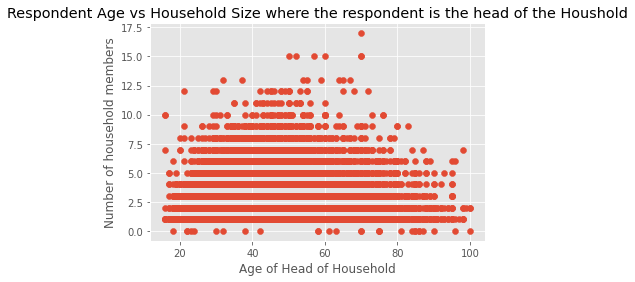

In [18]:
# Scatter plot of Age and Household size

plt.scatter(x = "Respondent Age", y = "household_size", data = fin_all[fin_all["The relathip with head"] == "Head of Household"])

plt.title("Respondent Age vs Household Size where the respondent is the head of the Houshold")

plt.xlabel("Age of Head of Household")

plt.ylabel("Number of household members")

plt.show()

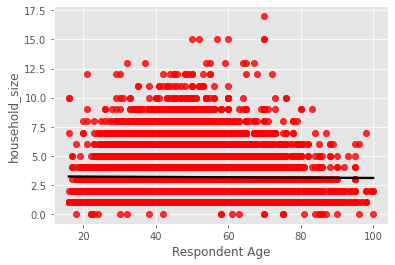

In [19]:
# Plotting a reg plot (regression)
# We use Seaborn

sns.regplot(x = "Respondent Age", y = "household_size", data = fin_all[fin_all["The relathip with head"] == "Head of Household"], scatter_kws = {"color": "red"}, line_kws = {"color": "black"})

In [20]:
# Correlation

# Only works on numerical fields
# not much to do on them here

fin_all.corr() # pearson by default

,household_size,Respondent Age
household_size,1.000000,-0.119446
Respondent Age,-0.119446,1.000000


In [21]:
# We have several correlations: pearson, kendall and spearman

fin_all.corr(method = "kendall")

,household_size,Respondent Age
household_size,1.000000,-0.064812
Respondent Age,-0.064812,1.000000


In [22]:
fin_all.corr(method = "spearman")

,household_size,Respondent Age
household_size,1.000000,-0.093436
Respondent Age,-0.093436,1.000000


In [23]:
# We change all values into numericals in order to calculate correlations

fin_all_num = fin_all

for col in fin_all_num.columns:
    if (fin_all_num[col].dtype == 'object'):
        fin_all_num[col] = fin_all_num[col].astype('category')
        fin_all_num[col] = fin_all_num[col].cat.codes
        
fin_all_num

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,0,1,0,1,3,24,0,5,2,4,9
1,0,2,1111,0,0,0,5,70,0,1,4,1,4
2,0,2,2222,1,1,1,5,26,1,3,3,6,9
3,0,2,3333,0,0,1,5,34,0,1,2,3,3
4,0,2,4444,0,1,0,8,26,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,1239,0,0,1,4,48,0,1,0,1,7
23520,3,2,1240,0,0,1,2,27,0,1,3,4,7
23521,3,2,1241,0,0,1,5,27,0,4,4,3,7
23522,3,2,1242,0,1,1,7,30,0,4,0,4,9


In [24]:
fin_all

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,0,1,0,1,3,24,0,5,2,4,9
1,0,2,1111,0,0,0,5,70,0,1,4,1,4
2,0,2,2222,1,1,1,5,26,1,3,3,6,9
3,0,2,3333,0,0,1,5,34,0,1,2,3,3
4,0,2,4444,0,1,0,8,26,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,1239,0,0,1,4,48,0,1,0,1,7
23520,3,2,1240,0,0,1,2,27,0,1,3,4,7
23521,3,2,1241,0,0,1,5,27,0,4,4,3,7
23522,3,2,1242,0,1,1,7,30,0,4,0,4,9


In [25]:
fin_all_num.corr()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.000000,-0.095136,-0.053491,-0.163207,0.148296,-0.149253,-0.159121,-0.058765,-0.028989,0.129311,0.006876,-0.049896,0.377380
year,-0.095136,1.000000,-0.237632,0.111510,0.214015,-0.066043,-0.052776,-0.019237,-0.000340,0.002008,-0.023936,0.176277,0.267126
uniqueid,-0.053491,-0.237632,1.000000,-0.022593,-0.073218,0.029144,0.027456,0.013935,0.005648,-0.013950,0.003722,-0.053592,-0.105933
Has a Bank account,-0.163207,0.111510,-0.022593,1.000000,0.088840,0.212680,-0.018201,0.020480,0.114994,-0.071091,-0.038073,0.319418,-0.065555
Type of Location,0.148296,0.214015,-0.073218,0.088840,1.000000,-0.078875,-0.272207,-0.047315,0.010669,0.016298,0.077646,0.125128,0.364500
Cell Phone Access,-0.149253,-0.066043,0.029144,0.212680,-0.078875,1.000000,0.100062,-0.103340,0.103003,-0.049033,-0.092928,0.248980,-0.147075
household_size,-0.159121,-0.052776,0.027456,-0.018201,-0.272207,0.100062,1.000000,-0.119446,0.013033,0.088355,-0.108981,-0.006687,-0.180795
Respondent Age,-0.058765,-0.019237,0.013935,0.020480,-0.047315,-0.103340,-0.119446,1.000000,0.012865,-0.151048,0.219951,-0.350444,-0.102707
gender_of_respondent,-0.028989,-0.000340,0.005648,0.114994,0.010669,0.103003,0.013033,0.012865,1.000000,-0.467862,-0.100356,0.117455,-0.031229
The relathip with head,0.129311,0.002008,-0.013950,-0.071091,0.016298,-0.049033,0.088355,-0.151048,-0.467862,1.000000,-0.139801,-0.018053,0.040724


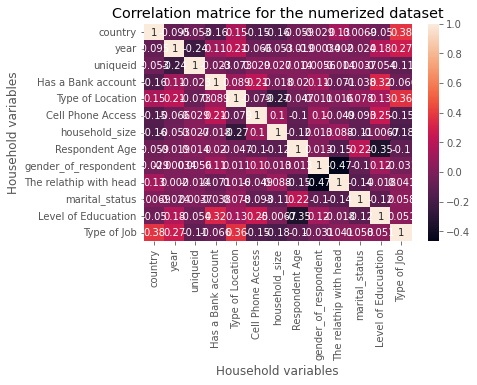

In [26]:
# A heatmap of the correlations

corr_matrix = fin_all_num.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the numerized dataset")

plt.xlabel("Household variables")

plt.ylabel("Household variables")

plt.show()

In [34]:
# using unstacking

pd.set_option('display.max_rows', None)

corr_unstack = corr_matrix.unstack()

corr_unstack.sort_values()

The relathip with head  gender_of_respondent     -0.467862
gender_of_respondent    The relathip with head   -0.467862
Level of Educuation     Respondent Age           -0.350444
Respondent Age          Level of Educuation      -0.350444
Type of Location        household_size           -0.272207
household_size          Type of Location         -0.272207
uniqueid                year                     -0.237632
year                    uniqueid                 -0.237632
Type of Job             household_size           -0.180795
household_size          Type of Job              -0.180795
country                 Has a Bank account       -0.163207
Has a Bank account      country                  -0.163207
household_size          country                  -0.159121
country                 household_size           -0.159121
The relathip with head  Respondent Age           -0.151048
Respondent Age          The relathip with head   -0.151048
country                 Cell Phone Access        -0.1492

In [28]:
# From the above heatmap representing the correlation matrix,

# We can see that none of the variables can be considered correlated to the dependent " Has a Bank account" variable

# And at the same time, all the independent variables are also uncorrelated to each other.

# All correlations vary between -0.5 and 0.4 which are weak correlations.

In [35]:
# Creating dependent and independent variables

y = dependent = fin_all_num["Has a Bank account"]

X = independent = fin_all_num.loc[:,fin_all_num.columns != "Has a Bank account"]

In [36]:
# Fitting a linear regression

from sklearn import linear_model

fin_regress = linear_model.LinearRegression()

fin_regress.fit(X, y)

LinearRegression()

In [37]:
# A look at the coefficients for our regression

fin_regress.coef_

array([-4.15997007e-02,  2.15321797e-02, -6.73299332e-07,  6.33386129e-02,
        1.05340805e-01, -2.51479996e-03,  2.85913377e-03,  4.09884415e-02,
        3.56085869e-04, -6.25045199e-03,  8.68896968e-02, -6.01120505e-03])

In [38]:
# A look at our intercept

fin_regress.intercept_

-0.2635468363260953

In [33]:
# Wit the the intercept and the coefficients given, we can do predictions for values of "Has a bank account" variable.